# CIFAR-10 을 이용한 CNN 구축

In [0]:
# tensor 2.0

%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam  ## 초보자용 에러가 잘 안남 , 일단 아담 쓰고 여러 옵티마이저 비교
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horese','ship','truck']

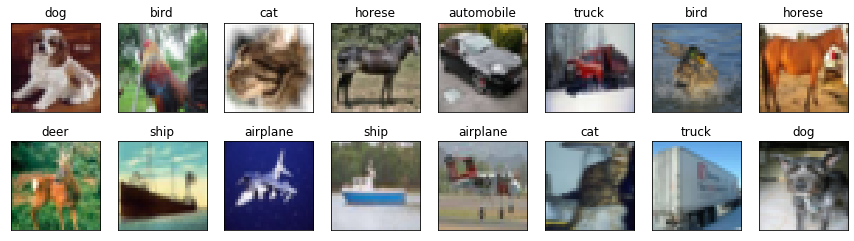

In [0]:
fig, axes = plt.subplots(2,8, figsize = [15,4])
axes = axes.ravel() # array 하나로 묶기 
for i in range(16):
  idx = np.random.randint(0, len(y_train))  # integer 숫자를 랜덤하게 뽑기
  axes[i].imshow(X_train[idx,:])
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_title(cifar10_classes[y_train[idx,0]])

In [0]:
# normalization 
## minmax -> 이미지는 0~255니까!
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
# one-hot-encording
## 결과값 0,1로 변환!
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [0]:
# 데이터타입 tensor형으로 변경
## 10000번씩 섞어서 64개씩 묶어주기
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)  # 검증하는거니까 섞을 필요 없음

In [0]:
# 모델 생성
## padding = 'same' : 패딩안함

model = Sequential() 

model.add(Conv2D(16, (3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten()) # 펴주기!
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)         

In [0]:
# model compile
## fitting
model.compile(loss='categorical_crossentropy',  # loss정해주기 = 손실함수
              optimizer=Adam(lr=0.001),         # lr = learning rate 
              metrics = ['accuracy'])           # 정확도 확인

In [0]:
history = model.fit(train_ds, 
                    epochs = 5,               # fitting 횟수
                    validation_data=test_ds, 
                    verbose=1, 
                    shuffle=True)

Train for 782 steps, validate for 157 steps
Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6833 - accuracy: 0.7559 - val_loss: 0.6909 - val_accuracy: 0.7655
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6805 - accuracy: 0.7609 - val_loss: 0.6660 - val_accuracy: 0.7752
Epoch 3/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6779 - accuracy: 0.7588 - val_loss: 0.6886 - val_accuracy: 0.7661
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6775 - accuracy: 0.7616 - val_loss: 0.6747 - val_accuracy: 0.7695
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6675 - accuracy: 0.7631 - val_loss: 0.6868 - val_accuracy: 0.7668


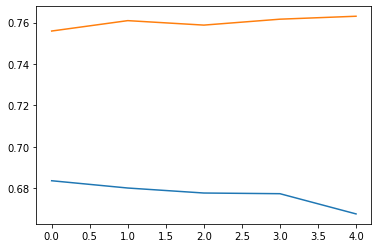

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [0]:
model.evaluate(test_ds, verbose=0)
# 손실, 정확도

[0.7168359536274224, 0.7556]

In [0]:
y_pred = model.predict_classes(X_test_scaled)
print(y_pred.shape)
print(y_pred)

(10000,)
[3 8 8 ... 5 3 7]


In [0]:
(y_true = y_test.ravel() # 펴주기
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

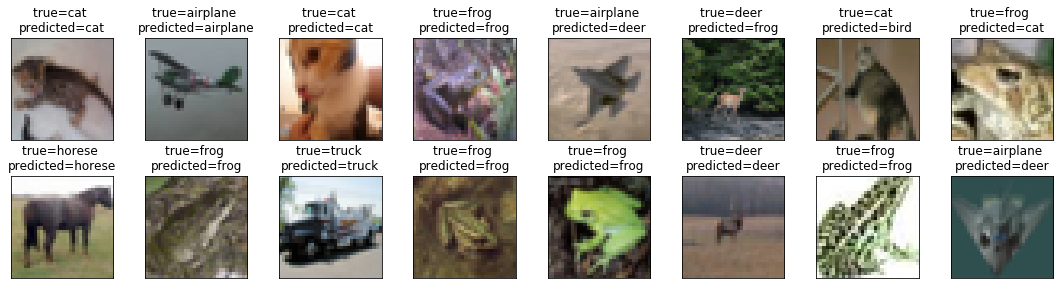

In [0]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifar10_classes[y_true[idx]], cifar10_classes[y_pred[idx]]))
plt.tight_layout()

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[639,  26,  58,  44,  20,   7,   8,  11, 142,  45],
       [  8, 816,   2,  21,   8,   6,   9,   4,  32,  94],
       [ 75,   8, 449, 107, 174,  87,  42,  25,  22,  11],
       [ 13,  11,  52, 546,  78, 190,  65,  12,  14,  19],
       [ 18,   5,  58,  88, 653,  56,  43,  60,  16,   3],
       [  5,   6,  51, 230,  63, 585,  12,  32,  10,   6],
       [  2,   3,  37, 111,  97,  21, 706,   6,  12,   5],
       [  9,   4,  31,  78, 111, 108,   8, 626,   8,  17],
       [ 36,  46,  14,  36,   9,   8,   4,   3, 816,  28],
       [ 22, 180,   5,  34,   8,   8,  12,  17,  56, 658]])

Test Accuracy : 0.6494


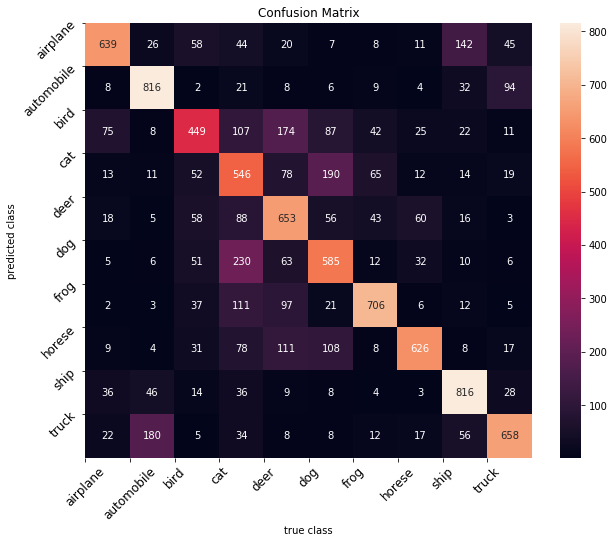

In [0]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt='d')

plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 140.model save / load
### 생성한 모델을 disk 에 저장하고 복원
- model 의 architecture 저장 : json, yaml format

- model 의 weigth 저장 : h5 file format

- hdf5(Hierarchical Data Format version 5)는 대용량 데이터를 저장하기 위한 파일 포맷

In [0]:
model.save('cifa_model.h5')

In [0]:
json_string = model.to_json()

with open('cifa.json','w') as json_file:
  json_file.write(json_string)
  

In [0]:
# weights만 저장
model.save_weights('cifa_weights.h5')

In [0]:
# load
from tensorflow.keras.models import model_from_json

f = open('cifa.json', 'r')
read_model = f.read()
read_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Activation", "config": {"name": "activation_3", "trainable": true, "dtype": "float32", "activation": "relu"}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class

In [0]:
# 컴파일 직전의 모델 나옴

loaded_model = model_from_json(read_model)

loaded_model.load_weights('cifa_weights.h5')

In [0]:
# 모델 컴파일
loaded_model.compile(loss='categorical_crossentropy',
                     optimizer = 'adam',
                     metrics = ['accuracy'])

In [0]:
loaded_model.evaluate(X_test_scaled, y_test_onehot)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.6875 - accuracy: 0.7668


[0.6875276836395263, 0.7668]